In [15]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, balanced_accuracy_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, SplineTransformer
from sklearn.compose import ColumnTransformer
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
df = pd.read_csv('data/clean/Cleaned_Data.csv')
df.dropna(inplace=True)
df['log_followers'] = np.log(df['followers_count']+1)
df['log_length'] = np.log(df['length']+1)

## Top Scores

In [17]:
artist_summary = df.groupby('artist')['score'].filter(
#filter for artists with more than 5 reviews
    lambda x: len(x) > 5
).groupby(df['artist']).agg(['mean', 'median']).sort_values(
    by='mean', ascending=False
).head(5)
print(artist_summary)

genre_summary = df.groupby('main_genre')['score'].filter(
#filter for genres with more than 40 reviews
    lambda x: len(x) > 40   
).groupby(df['main_genre']).agg(['mean', 'median']).sort_values(
    by='mean', ascending=False
).head(5)
print(genre_summary)

                       mean  median
artist                             
Stevie Wonder      9.000000    9.45
Talking Heads      8.983333    8.70
Alice Coltrane     8.950000    8.65
Prince             8.710000    8.60
Bruce Springsteen  8.570000    8.65
                  mean  median
main_genre                    
Jazz          7.758576     7.7
Experimental  7.545765     7.6
Metal         7.480788     7.6
Folk/Country  7.477056     7.5
Rock          7.383387     7.4


## Score by Follower Count

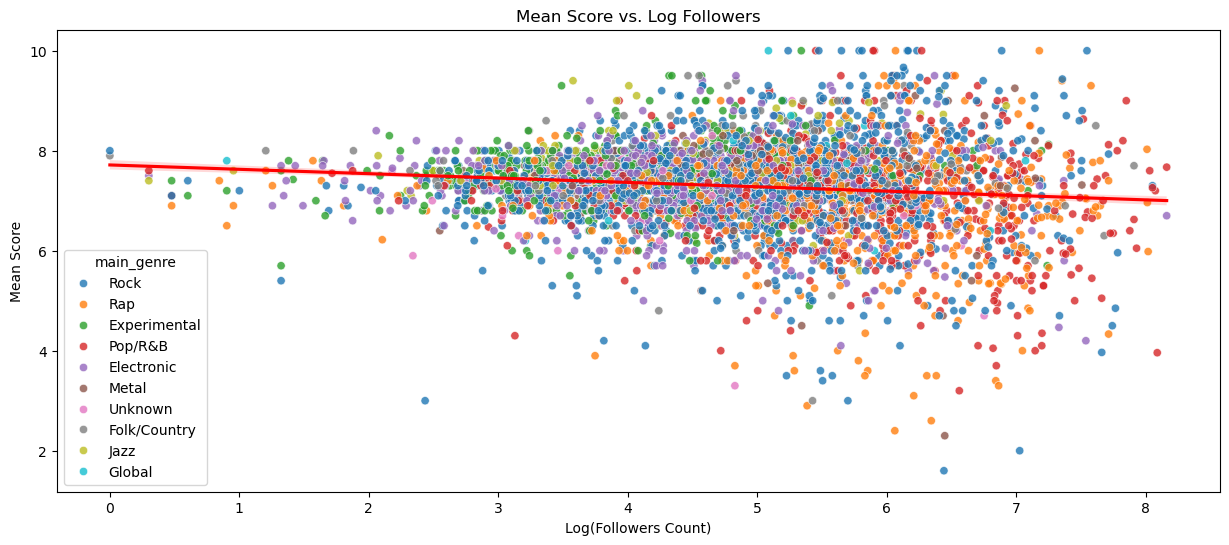

In [ ]:
#take average score by artist
artist_df = df.groupby('artist')[['followers_count', 'score', 'main_genre']].agg({
    'followers_count': 'mean',
    'score': 'mean',
    'main_genre': 'first'
}).reset_index()
#Log transform followers
artist_df['log_followers'] = np.log10(artist_df['followers_count']+1)

#scatterplot (with color by genre)
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=artist_df, 
    x='log_followers', 
    y='score', 
    hue='main_genre',
    palette='tab10',
    alpha=0.8
)
#add regression line
sns.regplot(
    data=artist_df, 
    x="log_followers", 
    y="score", 
    scatter=False, 
    color="red"
)

plt.title("Mean Score vs. Log Followers")
plt.xlabel("Log(Followers Count)")
plt.ylabel("Mean Score")

if not os.path.exists("Visualizations/pitchfork_followers_by_artist.png"):
    plt.savefig("Visualizations/pitchfork_followers_by_artist.png")

plt.show()